# Chapter 2. 텍스트 전처리
* [github 주소](https://github.com/wikibook/textmining)

In [2]:
# 예제 파일 다운로드 방법1: 저장소를 복제 
# !git clone https://github.com/wikibook/textmining

## 01. 텍스트 전처리의 개념
* 자연어 처리
    * 준비 단계: 자연어로 쓰여진 글을 전처리 하는 단계
    * 변환 단계: 전처리된 결과를 컴퓨터가 다루고 이해할 수 있는 형태로 바꾸는 단계
    * 분석 단계: 변환된 형태를 이용해 다양한 분석을 수행하는 단계 
* 텍스트 전처리
    * 일반적으로 공통적인 과정거침
    * 컴퓨터가 다룰 수 있는 형태로 변환하는 작업: 분석의 목적과 방법론에 따라 달라짐 
    * 문서 분류/요약/생성, Q&A 답 생성, 기계 번역등에 사용 

In [3]:
#----------------------------------------
# 2.1.1 왜 전처리가 필요한가?
#----------------------------------------
# 컴퓨터에 어떤 문장을 이해시키고 싶으면, 하나의 문자열로 이루어진 문장/문서를
# 단어 단위로 나눈 후, 이 단어들을 리스트 형태로 변환해야 함 
# 쓸모 없는 문자 제거 (stopwords)
# 파생 단어 정규화 

In [4]:
#----------------------------------------
# 2.1.2 전처리의 단계
#----------------------------------------
# 텍스트 전처리(Text Preprocessing)
    # 1. 주어진 텍스트에서 노이즈와 같이 불필요한 부분을 제거
    # 2. 문장을 표준 단어들로 분리
    # 3. 각 단어의 품사를 파악하는 것  

    # 1. 정제 (Cleaning)
        # 분석에 불필요한 노이즈를 제거(noise removal) 
        # 토큰화 이전/이후 정제 작업 지속적으로 이루어짐 
        # 사전에 있는 유의미한 단어라도 분석에 별 도움이 안 되는 단어 제거: 불용어(stopwords) 제거

    # 2. 토큰화(Tokenization)
        # 텍스트를 원하는 단위(토근: token)로 나누는 작업 
        # 문장 토근화(sentence tokenization): 문장 단위 토근화  
        # 단어 토근화(word tokenization): 단어 단위 토근화
        # 최소 단위는 단어가 아니어 됨 (한국어 같은 경우: 형태소 토큰화)

    # 3. 정규화(Normalization)
        # 같은 의미를 가진 동일한 단어임에도 불구하고 다른 형태로 쓰여진 단어들을 통일시켜서 
        # 표준 단어로 만드는 작업 
        # 다양한 변형을 원형의 형태로 통일하는 작업을 정규화라고 함 
        # 정규화: 어간 추출/ 표제어 추출(lemmatization)

    # 4. 품사 태깅(Part of Speech Tagging)
        # 품사는 단어를 문법적인 기능에 따라 분류하는 것을 말함 
        # (품사 종류 ex. 명사, 대명사, 동사, 형용사 )
        # 품사 태깅은 앞서 토큰화한 단어에 대해 품사를 파악해 부착하는 것을 의미 
        # 같은 단어도 문맥에 따라 의미, 품사가 바뀜 (문맥 파악이 필수) 

In [5]:
#----------------------------------------
# 2.1.3 실습 구성
#----------------------------------------
# 영어, 한글 전처리 
# 전반적 실습 과정 : 영어를 기준으로 구성 / 한국어 별도로 내용 구성
# 영어 : NLTK 패키지 이용 
# 한국어: KoNLPy(Korean NLP in Python)

## 02. 토큰화
* NLTK
    * 교육용으로 개발된 자연어 처리/ 문서 분석용 파이썬 패키지 
    * WordNet을 비롯해 자연어 처리를 지원하는 다양한 라이브러리 문서(말뭉치) & 예제 제공 
    * nltk.download 를 이용해 punkt, webtext, wordnet, stopwords를 다운로드 & 설치

In [6]:
# 필요한 nltk 라이브러리 다운로드 
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
#----------------------------------------
# 2.2.1 문장 토큰화
#----------------------------------------
# 토큰화 : 주어진 텍스트를 원하는 단위(토큰, token) 으로 나누는 작업 
# 먼저 나누려는 단위가 문장인 경우에 : 문장 토근화 수행 
# 여러 문장 -> 각 문장으로 나눔 
# nltk, sent_tokenize사용 

# 1. para 에 대상이 되는 텍스트 저장 
para = """Hello everyone.
          It's a good to see you.
          Let's start out text mining class!"""

# 2. sent_tokenize()를 임포트 
from nltk.tokenize import sent_tokenize 

# 3. sent_tokenize()에 para를 인수로 주고 실행한 결과를 출력  
# 주어진 텍스트를 문장 단위로 토근화, 주로 .!? 등을 이용 
print(sent_tokenize(para))

# 출력된 결과: 각 문장을 문자열로 갖는 리스트 

['Hello everyone.', "It's a good to see you.", "Let's start out text mining class!"]


In [8]:
sentence_list = sent_tokenize(para)
sentence_list[0]

'Hello everyone.'

In [9]:
# 프랑스어 사전학습된 모델 (한국어는 현재 nltk 사전 학습 모델 없음)
paragraph_french = """Je t'ai demandé si tu m'aimais bien, Tu m'a répondu non. 
Je t'ai demandé si j'étais jolie, Tu m'a répondu non. 
Je t'ai demandé si j'étai dans ton coeur, Tu m'a répondu non."""

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
print(tokenizer.tokenize(paragraph_french))

["Je t'ai demandé si tu m'aimais bien, Tu m'a répondu non.", "Je t'ai demandé si j'étais jolie, Tu m'a répondu non.", "Je t'ai demandé si j'étai dans ton coeur, Tu m'a répondu non."]


In [10]:
para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 텍스트마이닝 클래스를 시작해봅시다!"

# 한국어에 대해서도 sentence_tokenizer는 잘 작동함 
print(sent_tokenize(para_kor))

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 텍스트마이닝 클래스를 시작해봅시다!']


In [11]:
#----------------------------------------
# 2.2.2 단어 토큰화
#----------------------------------------
# 대상이 되는 텍스트를 단어 단위로 분리함 
# NLTK에서는 word_tokenize로 단어 토큰화 가능 

from nltk.tokenize import word_tokenize

# 주어진 text를 word 단위로 tokenize 함 
print(word_tokenize(para))

# It's - It & 's로 분리됨 

['Hello', 'everyone', '.', 'It', "'s", 'a', 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'out', 'text', 'mining', 'class', '!']


In [12]:
# It's - It ,',s 로 분리함 
# 자신의 목적에 맞는 tokenizer를 사용해야 함 
# 모든 구두점을 단위로 분해 
from nltk.tokenize import WordPunctTokenizer 
print(WordPunctTokenizer().tokenize(para))

['Hello', 'everyone', '.', 'It', "'", 's', 'a', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'out', 'text', 'mining', 'class', '!']


In [28]:
print(word_tokenize(para_kor))

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '텍스트마이닝', '클래스를', '시작해봅시다', '!']


In [ ]:
# 한글을 대상으로 하는 토큰화 : 의미를 가지는 최소 단위 (형태소) 텍스트 분리를 의미함 
# 공백과 같이 단어를 구분해 주는 것 : 단어 경계(word boundary) 
# 새로운 방법으로 단어를 분리 , 단어 분할(word segmentation) 수행 
# 파이썬 기반 한글 토큰화/형태소 분석기 :KoNLPy 

In [30]:
#----------------------------------------
# 2.2.3 정규 표현식을 이용한 토큰화
#----------------------------------------
# 정규표현식 regex / regexp라고 줄여서 표현
# 문자열에 대해 원하는 검색 패턴을 지정하는 방법 
# 문자열을 검색, 치환하는데 사용됨 

# ex1. [abc] - a,b,c 중 하나라도 일치하는 문자들을 가져옴 
# re: 정규표현식 지원 라이브러리  
# re(인수, 문자열) - 문자열에서 인수 검색해 매칭되는 모든 값 반환 

import re
re.findall("[abc]", "How are you, boy?")

['a', 'b']

In [33]:
# 숫자 찾는 경우 
re.findall("[0123456789]", "3a7b5c9d")
re.findall("[0-9]", "3a7b5c9d")

['3', '7', '5', '9']

In [35]:
# 알파벳 찾는 경우 
re.findall("[a-zA-Z]", "3a7b5c9d") # 영어 대문자/소문자
re.findall("[a-zA-Z0-9_]", "3a7b5c9d") # 영어 대문자/소문자/숫자/_
re.findall("[\w]", "3a 7b_ '.^&5c9d") # 위와 동일 (알파벳, 숫자,_) 

['3', 'a', '7', 'b', '_', '5', 'c', '9', 'd']

In [ ]:
# + : 한 번 이상의 반복 
re.findall("[_]+", "a_b, c__d, e___f") # _가 한 번  이상 반복된 부분 

In [ ]:
# \w : 공백/스페이스를 포함하지 않음 
# 공백이나 쉼표 등으로 구분되는 단어 찾아냄 
re.findall("[\w]+", "How are you, boy?")

In [38]:
# + : 1번 이상 반복  
# {}: 정확한 숫자 지정 
# {2,4}: 2~4회 반복된 문자열 
re.findall("[o]{2,4}", "oh, hoow are yoooou, boooooooy?")

['oo', 'oooo', 'oooo', 'ooo']

In [36]:
# NLTK, 정규표현식을 사용하는 토크나이저 : RegexpTokenizer 

from nltk.tokenize import RegexpTokenizer
#regular expression(정규식)을 이용한 tokenizer
# [\w']+ : 문자, 숫자, '
tokenizer = RegexpTokenizer("[\w']+") 

#단어단위로 tokenize \w:문자나 숫자를 의미 즉 문자나 숫자 혹은 '가 반복되는 것을 찾아냄
print(tokenizer.tokenize("Sorry, I can't go there."))
# can't를 하나의 단어로 인식

['Sorry', 'I', "can't", 'go', 'there']


In [37]:
# # [\w']+ : 문자, 숫자
tokenizer = RegexpTokenizer("[\w]+") 
print(tokenizer.tokenize("Sorry, I can't go there."))

['Sorry', 'I', 'can', 't', 'go', 'there']


In [39]:
# 텍스트를 모두 소문자로 바꾸고 
# '를 포함해 세 글자 이상의 단어들만 골라내고 싶은 경우 
text1 = "Sorry, I can't go there."
tokenizer = RegexpTokenizer("[\w']{3,}") 
print(tokenizer.tokenize(text1.lower()))

['sorry', "can't", 'there']


In [40]:
#----------------------------------------
# 2.2.4 노이즈와 불용어 제거
#----------------------------------------
# 불용어: 의미 없는 특수 문자 등과는 별도로 , 실제 사용되는 단어이지만 , 분석에는 별 필요가 없는 단어

from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

text1 = "Sorry, I couldn't go to movie yesterday."

tokenizer = RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(text1.lower()) #word_tokenize로 토큰화

result = [word for word in tokens if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성
print(result)

['sorry', 'go', 'movie', 'yesterday']


In [41]:
print(english_stops) #nltk가 제공하는 영어 stopword를 확인

{'them', 'where', 'yours', 'about', 'than', "aren't", "mustn't", 'who', 'were', 'to', 'so', 'won', 'whom', 'have', 'weren', 'has', "hasn't", "it's", 'its', 'that', 'here', 'further', 'now', 'very', 'not', 'ourselves', 'after', 'no', 'isn', 'mightn', 'with', 'me', 'what', 'there', 'had', 'haven', 'will', "shouldn't", 'or', "isn't", 'through', 'can', "haven't", 'only', 'most', 'into', 'again', 're', 'doing', 'did', 'their', 'when', 'for', 'i', 'himself', 'hers', 'over', 'shouldn', 'wouldn', 's', 'his', 'themselves', 'y', 'should', 'don', 'ma', 'more', "you're", 'as', 'was', 'yourself', 'same', 'being', 'those', 'below', "should've", 'her', 'she', 'itself', 'such', 'nor', 'ours', 'o', 'do', 'while', "don't", 'of', "that'll", 'is', 'why', 'theirs', 'these', "hadn't", 'the', 'until', 'he', 'both', 'but', 'against', "wouldn't", 'didn', 't', "won't", 'needn', "she's", 'before', 'from', 'does', 'all', 'and', 'which', 'once', 'couldn', 'under', 'a', 'down', 'how', 'mustn', 'above', 'too', 'm', 

In [42]:
# 자신만의 stopwords를 만들고 이용
# 한글처리에서도 유용하게 사용할 수 있음
my_stopword = ['i', 'go', 'to'] #나만의 stopword를 리스트로 정의
result = [word for word in tokens if word not in my_stopword] 
print(result)

['sorry', "couldn't", 'movie', 'yesterday']


## 03. 정규화
* 같은 의미를 가진 동일한 단어이면서 다른 형태로 쓰여진 단어들을 통일해 표준 단어로 만드는 작업 
* ex. 가다 - 간다, 갔다, 가는 중이다, 가려고 한다 등 
* 어간 추출/ 표제어 추출로 나뉨

In [15]:
#----------------------------------------
# 2.3.1 어간 추출
#----------------------------------------
# 어형이 변형된 단어로부터 접사 등을 제거하고 
# 그 단어의 어간을 분리해 내는 작업 
# 어형: 단어의 형태 
# 어간: (stem) 어형변화에서 변화하지 않는 부분을 말함 
# ex. 간다, 갔다/ 작다, 작고, 작으니,
# 영어에 대한 어간추출 알고리즘 : 포터 스테머(Porter Stemmer), 랭카스터 스테머(Lancaster Stemmer)

#----------------------------------------
# 포터 스테머 
# 단어가 변형되는 규칙을 이용해 원형을 찾음 
# 결과가 항상 사전에 있는 올바른 단어는 아님 
# 하지만, 항상 같은 규칙, 동일한 형태로 변환됨 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()
print('"PorterStemmer"','\n',
      stemmer.stem('cooking'), 
      stemmer.stem('cookery'),
      stemmer.stem('cookbooks'))

#----------------------------------------
# 토큰화와 결합, 어간 추출 하는 예 
from nltk.tokenize import word_tokenize 

para = "Hello everyone, It's good to see you.\
        Let's start out text miing class!"

tokens = word_tokenize(para) # 토큰화 실행
print(tokens)
result= [stemmer.stem(token) for token in tokens]
# 모든 토큰에 대한 스테밍 실현 
print(result)

# everyone - everyon 
# mining - mine 

print('#----------------------------------------')
# 랭카스터 스테머(The LancasterStemmer class)
from nltk.stem import LancasterStemmer 
stemmer = LancasterStemmer()
print('"LancasterStemmer"','\n',
      stemmer.stem('cooking'), 
      stemmer.stem('cookery'),
      stemmer.stem('cookbooks'))

"PorterStemmer" 
 cook cookeri cookbook
['Hello', 'everyone', ',', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'out', 'text', 'miing', 'class', '!']
['hello', 'everyon', ',', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'out', 'text', 'mi', 'class', '!']
#----------------------------------------
"LancasterStemmer" 
 cook cookery cookbook


In [16]:
#----------------------------------------
# 2.3.2 표제어 추출
#----------------------------------------
# lemma 로 변환하는 뜻, '단어의 기본 형'으로 변역 
# 표제어 추출은 주어진 단어를 기본형으로 변환하는 것 

# 의미적 관점에서 '단어의 기본형'을 찾는 작업 
# 사전을 이용해 사전에 정의된 기본형으로 변환함 
# 영어(lemmatizer) : WordNet 의 lemmatizer 

# nltk 에서 WordNetLemmatizer 지원 
import nltk 
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos = 'v')) # 품사를 지정 
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

# 표제어 추출, 사전에 있는 단어의 기본형 반환 
# 이를 위해 품사가 필요할 수도 있다는 사실을 알 수 있음 
# 정확한 기본형을 알기 위해서는 품사를 알아야 하는데 
# 품사는 문장의 문맥을 파악해야만 알 수 있음 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


cooking
cook
cookery
cookbook


In [17]:
# lemmatizing 과 stemming 비교 
from nltk.stem import PorterStemmer 

stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))

stemming result: believ
lemmatizing result: belief
lemmatizing result: believe


## 04. 품사 태깅
* 토큰화, 정규화 과정 -> 형태소
* 형태소: 의미를 가진 가장 작은 말의 단위 

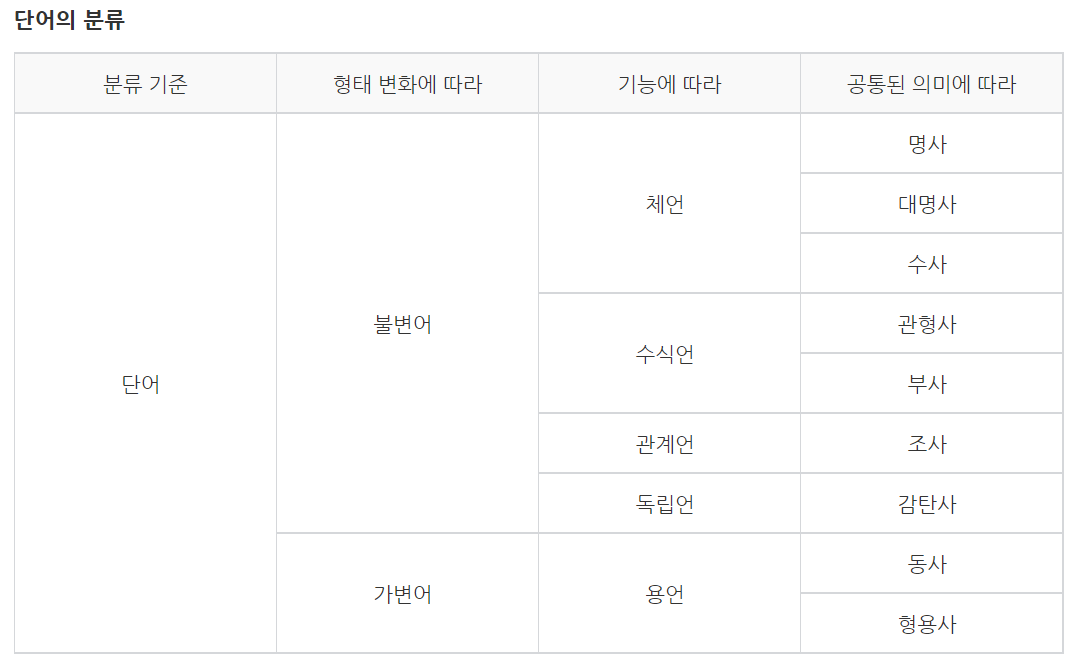

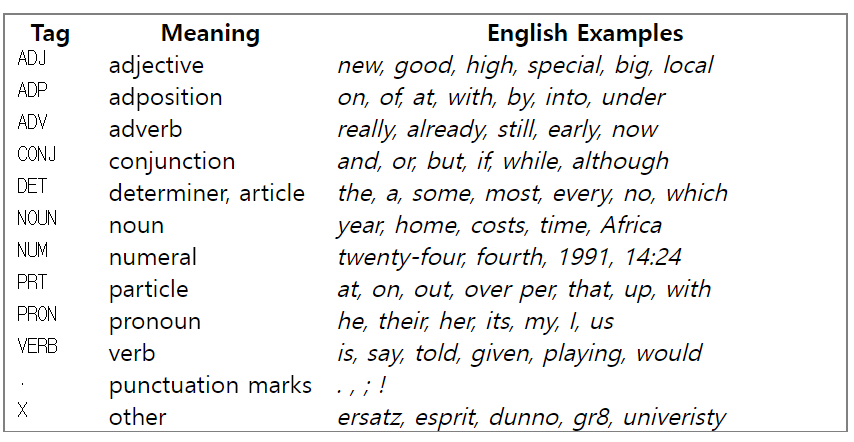

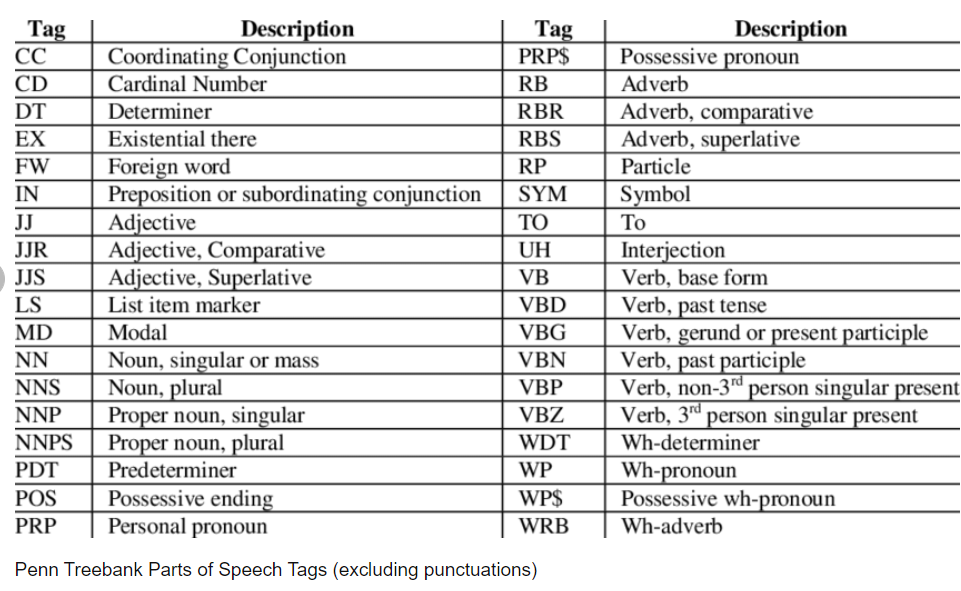

In [18]:
#----------------------------------------
# 2.4.1 품사의 이해
#----------------------------------------
# 품사: 명사, 대성사, 수사, 조사, ~ 
# 공통된 성질을 지닌 낱말끼리 모아 놓은 낱말의 갈래 

# 낱말
    # 뜻을 가지고 홀로 쓰일 수 있는 말의 가장 작은 단위 
    # 홀로 쓰일 수 있는 -- 자립 형식이 형태소와 다른 차이점 
#----------------------------------------
# 품사 태깅(Part-Of-Speech Tagging)
# 형태소에 대하여 품사를 파악해 부착(tagging) 하는 작업 
# 용언 
    # 동사와 형용사 
# 체언 
    # 명사, 대명사, 수사 
# 수식언 
    # 관형사, 부사 

from IPython.display import Image
display(Image(filename='img/ch2/한국어_품사.png'))
#----------------------------------------
# 공용 품사 태그 집합 
from IPython.display import Image
display(Image(filename='img/ch2/공용품사_태그집합.png'))
#----------------------------------------
# 펜 트리뱅크 태그 집합 (Penn Treebank Tagset) 
# 공용 품사 태그 집합에 비해 훨씬 세분화된 품사 분류 
from IPython.display import Image
display(Image(filename='img/ch2/Penn_treebank.png'))


In [19]:
#----------------------------------------
# 2.4.2 NLTK를 활용한 품사 태깅
#----------------------------------------
# nltk.pos_tag() : 토큰화된 결과에 대한 품사를 태깅해(단어, 품사) 로 구성된 튜플의 리스트로 품사 태깅 결과 반환

import nltk
from nltk.tokenize import word_tokenize 

tokens = word_tokenize("Hello everyone. It's good to seeyou. Let's start our text mining class!")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('seeyou', 'VB'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [20]:
# nltk : penn treebank 사용 
# 품사의 약자 모를 경우 : nltk.help.upenn_tagset(태그)
# 약어의 의미, 설명 볼 수 있음 
import nltk 
nltk.download('tagsets')
nltk.help.upenn_tagset('CC') # conjunction, coordinating 

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [21]:
# 원하는 품사의 단어들만 추출 
my_tag_set = ['NN','VB','JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'seeyou', 'Let', 'start', 'text', 'mining', 'class']


In [22]:
# 단어에 품사 정보를 추가해 구분 
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'seeyou/VB', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', '!/.']


In [23]:
#----------------------------------------
# 2.4.3 한글 형태소 분석과 품사 태깅
#----------------------------------------
# 형태소 분석 

# 음절 
    # 하나의 종합된 음의 느낌을 주는 말소리의 단위 
    # 하/느/리/참/놉/꼬/푸/르/다
# 형태소 
    # 뜻을 가진 가장 작은 말의 단위 
    # 하늘/이/참/높/고/푸르/다
# 단어 
    # 홀로 쓸 수 있는 말 
    # 하늘/이/참/높고/푸르다 
# 어절 
    # 문장을 구성하는 각각의 마디, 띄어쓰기의 단위 
    # 하늘이/참/높고/푸르다 

#----------------------------------------
# 품사 태깅 
# 한국어와 영어의 품사 체계는 다르기 때문에 nltk 사용 불가 

#----------------------------------------
# 한글 형태소 분석과 품사 태깅 
# nltk 대신 한국어를 위한 라이브러리 사용해야 함 
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


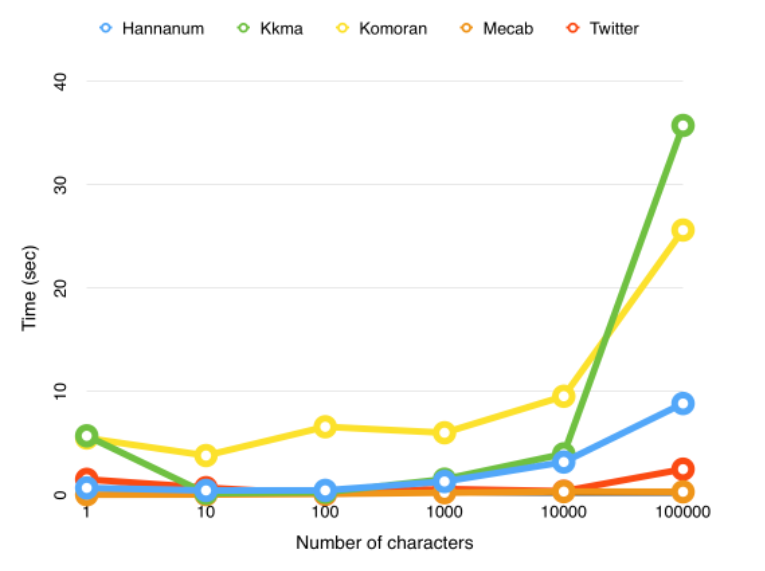

In [24]:
# 대표적 형태소 분석 및 품사 태깅 라이브러리 : KoNLPy(코엔엘파이)
# Hannunum, Kkma, Komoran, Twitter, Mecab 
# 클래스별 비교 : https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes
from IPython.display import Image 
Image(filename = 'img/ch2/konlpy)품사태깅_속도비교.PNG') 

In [25]:
# konlpy 설치 (windows)
# https://konlpy.org/ko/latest/install/
# 1. Java > 1,7 버젼 이상 
    # OS와 비트 수가 일치하고,
    # 버젼이 1.7 이상인 자바가 설치되어 있나요? 
    # 만일 그렇지 않다면 JDK를 설치 합니다. 
    # 자바와 OS의 비트 수가 꼭 일치하도록 해주세요.

# 2. JAVA_HOME을 설정 합니다.

# 3. OS의 비트 수와 일치하는 JPype1 (>=0.5.7) 를 설치해주세요. 
    # 32비트 OS에는 win32, 
    # 64비트 OS에는 win-amd64 파일을 사용하면 됩니다.
    # whl 파일로 설치하는 경우에는 다음과 같이 명령프롬프트에서 pip을 업그레이드 해주세요. 
    # (명령프롬프트는 Windows + r을 누른 후 실행창에서 cmd를 입력하면 띄울 수 있습니다.)

from konlpy.tag import Okt 
t = Okt()

In [26]:
# KoNLPy 의 형태소 분석 및품사 태깅 기능 사용법 
# morphs(phrase)
    # 주어진 텍스트를 형태소 단위로 분리함 
    # 따라서 반환 결과는 형태소의 리스트 

# nouns(phrase)
    # 주어진 텍스트를 형태소 단위로 분리함 
    # 명사만으르 반환, 반환 결과는 명사의 리스트 
    
# pos(phrase)
    # 주어진 텍스트를 형태소 단위로 분리함 
    # 형태소에 품사를 부착해 반환함 
    # (단어,품사) 로 구성된 튜플의 리스트 

print('형태소', t.morphs(sentence))
print()
print('명사', t.nouns(sentence))
print()
print('품사 태깅 결과', t.pos(sentence))

형태소 ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']

명사 ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']

품사 태깅 결과 [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 

In [27]:
#----------------------------------------
# 2.4.4 참고 자료
#----------------------------------------